### Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

/Users/sneha/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Load the Data

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# Create the dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df.shape

(150, 4)

In [13]:
# Explore the data
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
# Versicolor
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [23]:
# Verginica
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [24]:
# Setosa
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

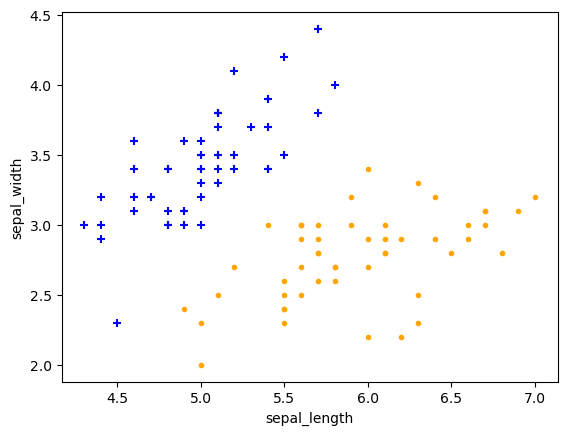

In [28]:
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color='blue', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color='orange', marker='.')
plt.show()

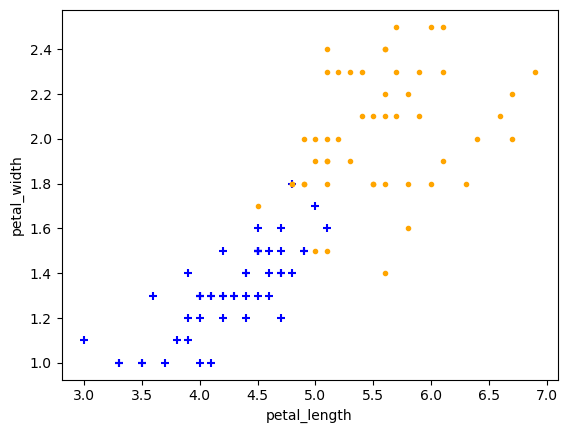

In [98]:
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='blue', marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color='orange', marker='.')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
x = df.drop(['target'], axis='columns')
y = df.target

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [36]:
# Creating k nearest neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [37]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
model.score(x_test,y_test)

0.9666666666666667

In [74]:
y_pred = model.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9666666666666667


In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [41]:
lr.fit(x_train,y_train)

LogisticRegression()

In [43]:
lr.score(x_test,y_test)

0.9333333333333333

In [76]:
y_pred1 = lr.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred1,y_test))

accuracy is 0.9333333333333333


In [78]:
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.87      1.00      0.93        13
           2       1.00      0.71      0.83         7

    accuracy                           0.93        30
   macro avg       0.96      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30

[[10  0  0]
 [ 0 13  0]
 [ 0  2  5]]


In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


pipe = Pipeline([('scaler',StandardScaler()), ('KNN',KNeighborsClassifier())])
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])

In [84]:
pipe.score(x_test,y_test)

0.9666666666666667

In [85]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


In [97]:
model.predict([[6.1,3.0,4.6,1.4]])

/Users/sneha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])